In [264]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import svm
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [265]:
data = pd.read_csv('CleanedData.csv')
data.head()

,Unnamed: 0,ZIPCODE,Timeto1,Timeto2,Timeto3,Timeto4,pctChange_Home,pctChange_Rent,cbd1jobs,cbd2jobs,cbd3jobs,cbd4jobs,cbd1change,cbd2change,cbd3change,cbd4change,2015_total,ZipJobChange
0,0,10001,18.316667,17.700000,23.783333,21.166667,54.210963,34.826552,459883.118759,1.223038e+06,248958.794898,78846.061508,0.023243,0.185227,0.025104,0.370434,164727.910353,0.263006
1,1,10002,16.716667,22.416667,18.033333,29.416667,11.850706,20.386593,459883.118759,1.223038e+06,248958.794898,78846.061508,0.023243,0.185227,0.025104,0.370434,23303.050046,0.238397
2,2,10003,13.416667,21.633333,25.250000,19.750000,14.800921,23.782520,459883.118759,1.223038e+06,248958.794898,78846.061508,0.023243,0.185227,0.025104,0.370434,80194.913684,0.131184
3,3,10007,5.183333,19.683333,8.183333,28.933333,2.061180,21.225268,459883.118759,1.223038e+06,248958.794898,78846.061508,0.023243,0.185227,0.025104,0.370434,49931.553576,-0.136797
4,4,10009,27.750000,34.333333,31.816667,36.950000,-0.694129,19.512861,459883.118759,1.223038e+06,248958.794898,78846.061508,0.023243,0.185227,0.025104,0.370434,8084.469003,0.372752


In [266]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [267]:
data.head()

,ZIPCODE,Timeto1,Timeto2,Timeto3,Timeto4,pctChange_Home,pctChange_Rent,cbd1jobs,cbd2jobs,cbd3jobs,cbd4jobs,cbd1change,cbd2change,cbd3change,cbd4change,2015_total,ZipJobChange
0,10001,18.316667,17.700000,23.783333,21.166667,54.210963,34.826552,459883.118759,1.223038e+06,248958.794898,78846.061508,0.023243,0.185227,0.025104,0.370434,164727.910353,0.263006
1,10002,16.716667,22.416667,18.033333,29.416667,11.850706,20.386593,459883.118759,1.223038e+06,248958.794898,78846.061508,0.023243,0.185227,0.025104,0.370434,23303.050046,0.238397
2,10003,13.416667,21.633333,25.250000,19.750000,14.800921,23.782520,459883.118759,1.223038e+06,248958.794898,78846.061508,0.023243,0.185227,0.025104,0.370434,80194.913684,0.131184
3,10007,5.183333,19.683333,8.183333,28.933333,2.061180,21.225268,459883.118759,1.223038e+06,248958.794898,78846.061508,0.023243,0.185227,0.025104,0.370434,49931.553576,-0.136797
4,10009,27.750000,34.333333,31.816667,36.950000,-0.694129,19.512861,459883.118759,1.223038e+06,248958.794898,78846.061508,0.023243,0.185227,0.025104,0.370434,8084.469003,0.372752


In [268]:
data.rename(columns={'2015_total':'ZipJobs'}, inplace=True)

In [269]:
data.head()

,ZIPCODE,Timeto1,Timeto2,Timeto3,Timeto4,pctChange_Home,pctChange_Rent,cbd1jobs,cbd2jobs,cbd3jobs,cbd4jobs,cbd1change,cbd2change,cbd3change,cbd4change,ZipJobs,ZipJobChange
0,10001,18.316667,17.700000,23.783333,21.166667,54.210963,34.826552,459883.118759,1.223038e+06,248958.794898,78846.061508,0.023243,0.185227,0.025104,0.370434,164727.910353,0.263006
1,10002,16.716667,22.416667,18.033333,29.416667,11.850706,20.386593,459883.118759,1.223038e+06,248958.794898,78846.061508,0.023243,0.185227,0.025104,0.370434,23303.050046,0.238397
2,10003,13.416667,21.633333,25.250000,19.750000,14.800921,23.782520,459883.118759,1.223038e+06,248958.794898,78846.061508,0.023243,0.185227,0.025104,0.370434,80194.913684,0.131184
3,10007,5.183333,19.683333,8.183333,28.933333,2.061180,21.225268,459883.118759,1.223038e+06,248958.794898,78846.061508,0.023243,0.185227,0.025104,0.370434,49931.553576,-0.136797
4,10009,27.750000,34.333333,31.816667,36.950000,-0.694129,19.512861,459883.118759,1.223038e+06,248958.794898,78846.061508,0.023243,0.185227,0.025104,0.370434,8084.469003,0.372752


In [270]:
data.columns

Index([u'ZIPCODE', u'Timeto1', u'Timeto2', u'Timeto3', u'Timeto4',
       u'pctChange_Home', u'pctChange_Rent', u'cbd1jobs', u'cbd2jobs',
       u'cbd3jobs', u'cbd4jobs', u'cbd1change', u'cbd2change', u'cbd3change',
       u'cbd4change', u'ZipJobs', u'ZipJobChange'],
      dtype='object')

In [271]:
data['feat1'] = (data['cbd1jobs']*data['cbd1change'])/data['Timeto1']
data['feat2'] = (data['cbd2jobs']*data['cbd2change'])/data['Timeto2']
data['feat3'] = (data['cbd3jobs']*data['cbd3change'])/data['Timeto3']
data['feat4'] = (data['cbd4jobs']*data['cbd4change'])/data['Timeto4']

In [272]:
features = data.iloc[:, 15:]
target = data[['pctChange_Home', 'pctChange_Rent']]

In [273]:
features.head()

,ZipJobs,ZipJobChange,feat1,feat2,feat3,feat4
0,164727.910353,0.263006,583.579793,12798.825324,262.786903,1379.869308
1,23303.050046,0.238397,639.435885,10105.838285,346.577551,992.880466
2,80194.913684,0.131184,796.713282,10471.766174,247.522713,1478.847276
3,49931.553576,-0.136797,2062.232130,11509.189241,763.741161,1009.466602
4,8084.469003,0.372752,385.197713,6598.229366,196.436307,790.452874


In [274]:
X = np.matrix(features)
X = sm.add_constant(X)
y = np.matrix(target['pctChange_Home']).T

In [275]:
model1 = smf.ols(formula='pctChange_Home ~ feat1 + feat2 + feat3 + feat4 + ZipJobChange + ZipJobs', data=data).fit()
print model1.summary()

                            OLS Regression Results                            
Dep. Variable:         pctChange_Home   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     6.360
Date:                Tue, 11 Dec 2018   Prob (F-statistic):           4.30e-06
Time:                        15:31:44   Log-Likelihood:                -874.82
No. Observations:                 188   AIC:                             1764.
Df Residuals:                     181   BIC:                             1786.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -8.1125      4.978     -1.630   

In [276]:
model1 = smf.ols(formula='pctChange_Rent ~ feat1 + feat2 + feat3 + feat4 + ZipJobChange + ZipJobs', data=data).fit()
print model1.summary()

                            OLS Regression Results                            
Dep. Variable:         pctChange_Rent   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     4.704
Date:                Tue, 11 Dec 2018   Prob (F-statistic):           0.000178
Time:                        15:31:44   Log-Likelihood:                -699.36
No. Observations:                 188   AIC:                             1413.
Df Residuals:                     181   BIC:                             1435.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.2185      1.957      6.753   

In [277]:
features.head()

,ZipJobs,ZipJobChange,feat1,feat2,feat3,feat4
0,164727.910353,0.263006,583.579793,12798.825324,262.786903,1379.869308
1,23303.050046,0.238397,639.435885,10105.838285,346.577551,992.880466
2,80194.913684,0.131184,796.713282,10471.766174,247.522713,1478.847276
3,49931.553576,-0.136797,2062.232130,11509.189241,763.741161,1009.466602
4,8084.469003,0.372752,385.197713,6598.229366,196.436307,790.452874


In [278]:
target.head()

,pctChange_Home,pctChange_Rent
0,54.210963,34.826552
1,11.850706,20.386593
2,14.800921,23.782520
3,2.061180,21.225268
4,-0.694129,19.512861


# PCA 

In [279]:
eigen = 6
pca = PCA(eigen)
p = pca.fit_transform(features)

Text(0,0.5,'Explained Variance (%)')

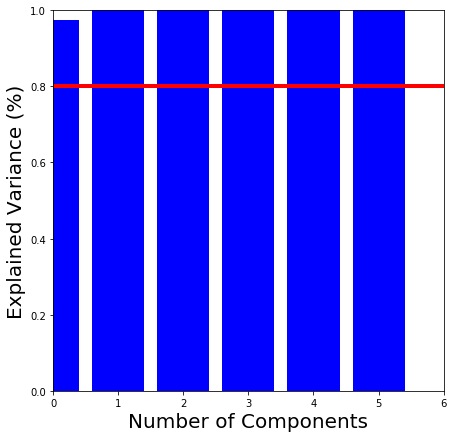

In [280]:
eigenvalues = pca.explained_variance_
plt.figure(figsize = (7, 7))

plt.bar(np.arange(eigen), eigenvalues.cumsum()/eigenvalues.sum(), align='center', color='b')
plt.xlim(0, eigen)
plt.ylim(0, 1)
plt.axhline(y=0.8, linewidth=4, color='r')
plt.xlabel('Number of Components', fontsize=20)
plt.ylabel('Explained Variance (%)', fontsize=20)

In [281]:
p1 = pd.DataFrame(p, columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6'])
p1.head()

,x1,x2,x3,x4,x5,x6
0,144522.377358,-1351.552289,-316.839336,-220.538832,2.620836,0.187662
1,3149.303759,3304.949619,-55.857278,332.669232,12.287661,0.019867
2,59986.145396,742.694579,214.118940,267.888413,-128.997257,0.002085
3,29819.355567,3336.086374,-298.709938,1678.915463,-272.764537,-0.035027
4,-12232.170814,585.782259,56.428456,133.120227,-12.744004,0.067168


In [282]:
p1['rent_change'] = data['pctChange_Rent'].values
p1['home_change'] = data['pctChange_Home'].values
p1.head()

,x1,x2,x3,x4,x5,x6,rent_change,home_change
0,144522.377358,-1351.552289,-316.839336,-220.538832,2.620836,0.187662,34.826552,54.210963
1,3149.303759,3304.949619,-55.857278,332.669232,12.287661,0.019867,20.386593,11.850706
2,59986.145396,742.694579,214.118940,267.888413,-128.997257,0.002085,23.782520,14.800921
3,29819.355567,3336.086374,-298.709938,1678.915463,-272.764537,-0.035027,21.225268,2.061180
4,-12232.170814,585.782259,56.428456,133.120227,-12.744004,0.067168,19.512861,-0.694129


In [283]:
model2 = smf.ols(formula= 'rent_change ~ x1 + x2 + x3 + x4 + x5 + x6', data=p1).fit()
print model2.summary()

                            OLS Regression Results                            
Dep. Variable:            rent_change   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     4.704
Date:                Tue, 11 Dec 2018   Prob (F-statistic):           0.000178
Time:                        15:31:44   Log-Likelihood:                -699.36
No. Observations:                 188   AIC:                             1413.
Df Residuals:                     181   BIC:                             1435.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.0303      0.742     26.990      0.0

In [284]:
model2 = smf.ols(formula= 'home_change ~ x1 + x2 + x3 + x4 + x5 + x6', data=p1).fit()
print model2.summary()

                            OLS Regression Results                            
Dep. Variable:            home_change   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     6.360
Date:                Tue, 11 Dec 2018   Prob (F-statistic):           4.30e-06
Time:                        15:31:44   Log-Likelihood:                -874.82
No. Observations:                 188   AIC:                             1764.
Df Residuals:                     181   BIC:                             1786.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.3737      1.887      3.907      0.0

In [285]:
p1.corr()

,x1,x2,x3,x4,x5,x6,rent_change,home_change
x1,1.000000e+00,-1.909612e-17,-4.156352e-17,-2.646736e-17,9.306144e-17,-1.387837e-17,0.161021,0.066924
x2,-1.909612e-17,1.000000e+00,-1.126753e-17,-1.826754e-16,7.006955e-17,1.434087e-16,0.294663,0.381183
x3,-4.156352e-17,-1.126753e-17,1.000000e+00,1.837698e-16,-5.862188e-17,-6.865076e-17,-0.016290,-0.079361
x4,-2.646736e-17,-1.826754e-16,1.837698e-16,1.000000e+00,1.567160e-16,3.136919e-16,0.107062,0.021782
x5,9.306144e-17,7.006955e-17,-5.862188e-17,1.567160e-16,1.000000e+00,-6.991390e-17,0.094361,0.125604
x6,-1.387837e-17,1.434087e-16,-6.865076e-17,3.136919e-16,-6.991390e-17,1.000000e+00,0.038942,0.042388
rent_change,1.610209e-01,2.946627e-01,-1.629046e-02,1.070625e-01,9.436077e-02,3.894222e-02,1.000000,0.299401
home_change,6.692422e-02,3.811833e-01,-7.936066e-02,2.178164e-02,1.256043e-01,4.238833e-02,0.299401,1.000000


# Cross validation for OLS

In [286]:
R1 = []
R2 = []

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(
             features, target['pctChange_Rent'], test_size=0.2, random_state=42)
    
    X_train1 = sm.add_constant(X_train)
    X_test1 = sm.add_constant(X_test)
    
    model = sm.OLS(y_train, X_train1).fit()
    
    R1.append(model.rsquared)
    
    y_pred_test = model.predict(X_test1)
    
    r2 = 1 - ((y_pred_test - y_test)**2).sum()/((y_test - y_test.mean())**2).sum()
    
    R2.append(r2)

In [287]:
print "in sample r2:", np.array(R1).mean(), np.array(R1).std()
print "out sample r2:", np.array(R2).mean(), np.array(R2).std()

in sample r2: 0.1134827717214563 2.7755575615628914e-17
out sample r2: 0.05804514430510654 6.938893903907228e-18


# Random forest regression

In [288]:
X = np.array(features)
y = np.array(target['pctChange_Home'])

In [289]:
X_train, X_test, y_train, y_test = train_test_split(
             features, target['pctChange_Rent'], test_size=0.3)

In [290]:
regr = RandomForestRegressor(random_state=0,
                             n_estimators=100)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [291]:
#from sklearn.datasets import make_regression
#X, y = make_regression(n_features=4, n_informative=2,
#                   random_state=0, shuffle=False)

In [292]:
print(regr.feature_importances_)

[0.37955542 0.08857613 0.16481062 0.11196037 0.10333712 0.15176033]


In [293]:
regr.score(X_train, y_train)

0.8662973690657467

In [294]:
regr.score(X_test, y_test)

0.19677961162646251

In [295]:
R1 = []
R2 = []

for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(
             features, target['pctChange_Rent'], test_size=0.3)
    
    #X_train1 = sm.add_constant(X_train)
    #X_test1 = sm.add_constant(X_test)
    
    regr = RandomForestRegressor(max_depth=None, random_state=0,
                             n_estimators=100)
    regr.fit(X_train, y_train)
    
    R1.append(regr.score(X_train, y_train))
    R2.append(regr.score(X_test, y_test))
    
    #y_pred_test = model.predict(X_test1)
    
    #r2 = 1 - ((y_pred_test - y_test)**2).sum()/((y_test - y_test.mean())**2).sum()
    
    #R2.append(r2)

In [296]:
print "in sample r2:", np.array(R1).mean(), np.array(R1).std()
print "out sample r2:", np.array(R2).mean(), np.array(R2).std()

in sample r2: 0.8790062632258362 0.012155744195700742
out sample r2: 0.05624723558440766 0.1906951328346871


In [ ]:
re.findall(r'\d+', 'hello 42 I\'m a 32 string 30')